# 2장. 딥러닝 핵심 미리보기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch02-colab.ipynb)

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비 

In [1]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [2]:
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") # 준비된 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]                                                   # 수술 후 사망/생존 여부를 y로 지정합니다.

In [3]:
# 데이터
X

array([[ 1.  ,  2.88,  2.16, ...,  1.  ,  0.  , 60.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  1.  ,  0.  , 51.  ],
       [ 2.  ,  2.76,  2.08, ...,  1.  ,  0.  , 59.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  ,  0.  , 52.  ],
       [ 2.  ,  1.96,  1.68, ...,  1.  ,  0.  , 79.  ],
       [ 2.  ,  4.72,  3.56, ...,  1.  ,  0.  , 51.  ]])

In [4]:
# 라벨
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

### 3. 구조 결정 

In [5]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 실행 

In [6]:
# 학습 수행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 5ms/step - loss: 1.1348 - accuracy: 0.8149
Epoch 2/5
30/30 [==============================] - 0s 4ms/step - loss: 0.7910 - accuracy: 0.8213
Epoch 3/5
30/30 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.8234
Epoch 4/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.8426
Epoch 5/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.8489


In [7]:
history.history

{'loss': [1.1347508430480957,
  0.7910469174385071,
  0.5757667422294617,
  0.4551164209842682,
  0.4322352111339569],
 'accuracy': [0.8148936033248901,
  0.8212766051292419,
  0.8234042525291443,
  0.8425531983375549,
  0.848936140537262]}

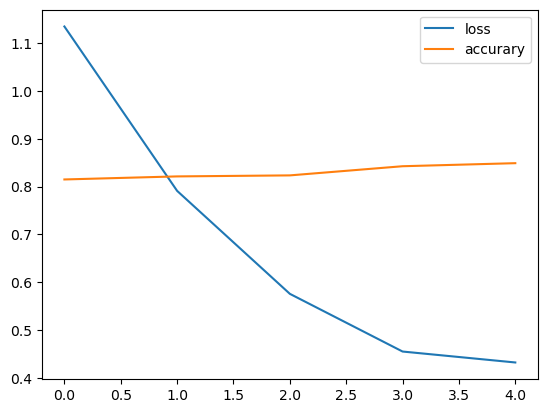

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 손실율 그래프
plt.plot(history.history['accuracy']) # 정확도 그래프
plt.legend(['loss', 'accurary']) # 범례
plt.show()

In [9]:
# Sequential 클래스를 이용한 신경망 구성
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential(name="Sequential_Model") # 순차 모델 생성
model.add(Input(shape=(4,), name="Input_Layer")) # 입력 레이어
model.add(Dense(50, activation="relu", name="Hidden_Layer")) # 노드 50개인 밀접 레이어
model.add(Dense(3, activation="softmax", name="Output_Layer")) # 노드 3개인 출력 레이어 -> 다중 분류 모델

model.summary()

Model: "Sequential_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 50)                250       
                                                                 
 Output_Layer (Dense)        (None, 3)                 153       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(4,)),
    Dense(50, activation="relu"),
    Dense(3, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                250       
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Keras Functional API
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate, Activation

input = Input(shape=(4,))
dense1 = Dense(50, activation="relu")(input)
dense2 = Dense(80, activation="relu")(input)
dense3 = Dense(30, activation="relu")(input)
x = concatenate([dense1, dense2, dense3])
output = Dense(3, activation="softmax")(x)

# 하나의 모델로 연결
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 50)           250         ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 80)           400         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           150         ['input_2[0][0]']                
                                                                                              